In [79]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
# Modify dataset to include test scores
%run -i calc_score.py

### Dataset

In [78]:
data_file = pd.read_csv("new_data.csv",skiprows=(2,1), usecols=(0,1,2,3,4,5,33))
data = pd.DataFrame(data_file)
data.sort_values(by=['Test Score'])

,Participant Code,Term,Test,Instructor,LetterGrade,PercentGrade,Test Score
73,3,1,Post,B,F,28.76,0.00
145,79,2,Pre,B,B+,86.68,0.00
75,81,1,Post,B,A,93.88,0.00
81,19,1,Pre,B,A,96.09,0.00
85,44,1,Pre,B,C-,71.46,0.00
...,...,...,...,...,...,...,...
77,64,1,Pre,B,A,101.30,51.85
92,35,1,Pre,B,A,103.24,51.85
44,72,1,Post,A,B-,73.66,51.85
13,84,1,Post,A,A,94.17,55.56


## Analysis
### Relationship between scores on the test and the final course grade (percentage)
From the two scatter plots below, we can see that there was no direct relation between test scores and final percentage grades for the class as a whole. What we can verify is that there was an overall improvement in both test scores and percentage grades between the group of Pre test takers, and the group of Post test takers.

#### Relation between Pre Test Scores and Final Percent Grade

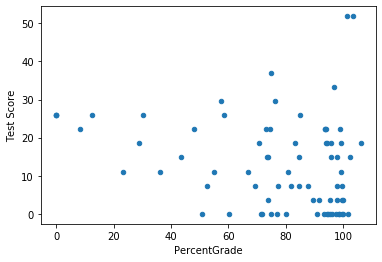

In [72]:
data_pre = pd.DataFrame(data[(data['Test']=="Pre")])
data_pre.drop_duplicates(subset ="Participant Code", keep = "first", inplace = True) 
scatter_plot = data_pre.plot.scatter(x='PercentGrade', y='Test Score')

#### Relation between Post Test Scores and Final Percent Grade

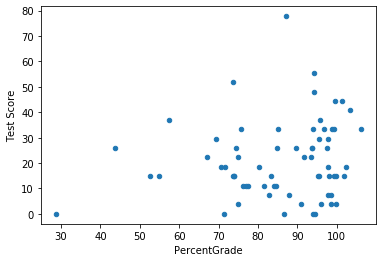

In [73]:
data_post = pd.DataFrame(data[(data['Test']=="Post")])
data_post.drop_duplicates(subset ="Participant Code", keep = "first", inplace = True) 
scatter_plot = data_post.plot.scatter(x='PercentGrade', y='Test Score')

## Analysis
### Relationship between Pre and Post test scores
From the graph below, we can see a clear improvement in average score between Pre tests and Post tests from the group of students who took both.

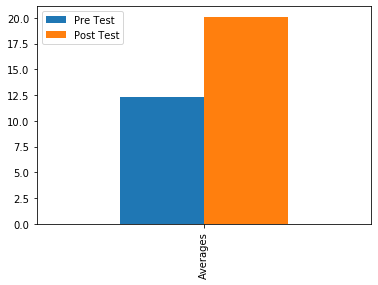

In [74]:
codes_pre = data_pre['Participant Code'].to_numpy()
codes_post = data_post['Participant Code'].to_numpy()
codes_pre_ind = pd.Index(codes_pre)
codes_post_ind = pd.Index(codes_post)
codes = codes_pre_ind.intersection(codes_post_ind) #only student codes who took both tests

pre_sc = data_pre[data_pre['Participant Code'].isin(codes)]
post_sc = data_post[data_post['Participant Code'].isin(codes)]

avgs = pd.DataFrame({'Pre Test': pre_sc['Test Score'].mean(),
                   'Post Test': post_sc['Test Score'].mean()}, index=['Averages'])
avgs.plot.bar()


## Analysis
### Relationship between Average Percent Grades
From the graphs below, we can see there's a slight difference in average scores between instructors A and B, and between terms 1 and 2. We can also see by the third graph that the difference by instructor is not much more significant than the difference by term. It is also worth noting that Instructor A only taught in term 1, and instructor B taught both terms 1 and 2.

#### Relationship between Average Percent Grades between Instructors

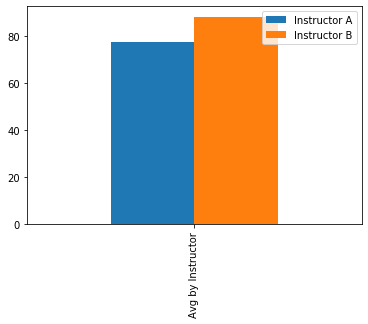

In [75]:
inst_a =  pd.DataFrame(data[(data['Instructor']=="A")])
inst_a_reduced = pd.DataFrame(inst_a[inst_a['Participant Code'].isin(codes)])
inst_a_reduced.drop_duplicates(subset ="Participant Code", keep = "first", inplace = True) 

inst_b =  pd.DataFrame(data[(data['Instructor']=="B")])
inst_b_reduced = pd.DataFrame(inst_b[inst_b['Participant Code'].isin(codes)])
inst_b_reduced.drop_duplicates(subset ="Participant Code", keep = "first", inplace = True) 

avgs_inst = pd.DataFrame({'Instructor A': inst_a_reduced['PercentGrade'].mean(), 'Instructor B' : inst_b_reduced['PercentGrade'].mean()}, index=['Avg by Instructor'])
avgs_inst.plot.bar()

#### Relationship between Average Percent Grades between Terms

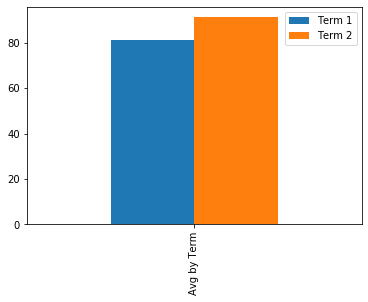

In [76]:
term_1 =  pd.DataFrame(data[(data['Term']==1)])
term_1_reduced = pd.DataFrame(term_1[term_1['Participant Code'].isin(codes)])
term_1_reduced.drop_duplicates(subset ="Participant Code", keep = "first", inplace = True) 


term_2 =  pd.DataFrame(data[(data['Term']==2)])
term_2_reduced = pd.DataFrame(term_2[term_2['Participant Code'].isin(codes)])
term_2_reduced.drop_duplicates(subset ="Participant Code", keep = "first", inplace = True) 


avgs_term = pd.DataFrame({'Term 1': term_1_reduced['PercentGrade'].mean(), 'Term 2' : term_2_reduced['PercentGrade'].mean()}, index=['Avg by Term'])
avgs_term.plot.bar()

#### Relationship between Difference in Averages by Instructor and by Term

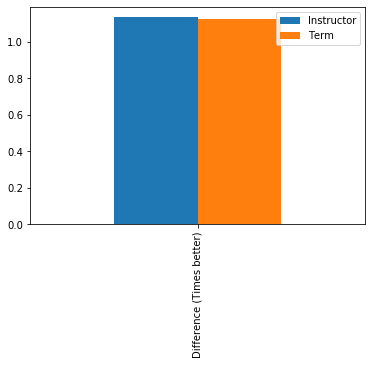

In [77]:
by_inst = (inst_b_reduced['PercentGrade'].mean()/inst_a_reduced['PercentGrade'].mean())
by_term = (term_2_reduced['PercentGrade'].mean()/term_1_reduced['PercentGrade'].mean())

avgs_diff = pd.DataFrame({'Instructor': by_inst, 'Term': by_term}, index=['Difference (Times better)'])
avgs_diff.plot.bar()